In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
houston_hourly = pd.read_csv('./Houston_TX/houston_hourly.csv')
cincy_hourly = pd.read_csv('./Cincinnati_KY/Cincinnati_hourly.csv')
newyork_hourly = pd.read_csv('./LaGuardia_NY/NewYork_hourly.csv')
atlanta_hourly = pd.read_csv('./Atlanta_GA/atlanta_hourly.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,4,5,7,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,7,9,10,12,13,14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,7,10,12,13,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,7,10,12,13,15) have mixed types.Specify dtype option on import 

### Inspect the Houston DataFrame

In [4]:
houston_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771942 entries, 0 to 771941
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 771942 non-null  int64  
 1   DATE                       771942 non-null  object 
 2   HourlyAltimeterSetting     534142 non-null  object 
 3   HourlyDewPointTemperature  655483 non-null  object 
 4   HourlyDryBulbTemperature   655912 non-null  object 
 5   HourlyPrecipitation        224787 non-null  object 
 6   HourlyPresentWeatherType   137795 non-null  object 
 7   HourlyPressureChange       114684 non-null  object 
 8   HourlyPressureTendency     115463 non-null  float64
 9   HourlyRelativeHumidity     655473 non-null  object 
 10  HourlySeaLevelPressure     494506 non-null  object 
 11  HourlySkyConditions        277609 non-null  object 
 12  HourlyStationPressure      307769 non-null  object 
 13  HourlyVisibility           68

#### Dropping known useless columns
These are columns predetermined not to add value due to their subjectivity

In [5]:
houston_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)
cincy_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)
newyork_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)
atlanta_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)

#### Converting "object" types into numeric values
Some of the data points are "29.99s" instead of "29.99" for example, and this code serves to 'coerce' them into numeric values

In [6]:
# not included: 'HourlyPresentWeatherType','HourlySkyConditions',
to_numeric_list = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency',
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed','HourlyWindGustSpeed']

for i in to_numeric_list:
    houston_hourly[i] = pd.to_numeric(houston_hourly[i], errors = 'coerce')
    cincy_hourly[i] = pd.to_numeric(cincy_hourly[i], errors = 'coerce')
    newyork_hourly[i] = pd.to_numeric(newyork_hourly[i], errors = 'coerce')
    atlanta_hourly[i] = pd.to_numeric(atlanta_hourly[i], errors = 'coerce')
    
############################################################
# if you want to try it on just one column first:
#houston_hourly['HourlyDryBulbTemperature'] = pd.to_numeric(houston_hourly['HourlyDryBulbTemperature'], errors = 'coerce')
################## and please recomment, thank you!

In [7]:
houston_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771942 entries, 0 to 771941
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DATE                       771942 non-null  object 
 1   HourlyAltimeterSetting     534033 non-null  float64
 2   HourlyDewPointTemperature  655321 non-null  float64
 3   HourlyDryBulbTemperature   655737 non-null  float64
 4   HourlyPrecipitation        210814 non-null  float64
 5   HourlyPressureChange       114596 non-null  float64
 6   HourlyPressureTendency     115463 non-null  float64
 7   HourlyRelativeHumidity     655466 non-null  float64
 8   HourlySeaLevelPressure     494451 non-null  float64
 9   HourlyStationPressure      307741 non-null  float64
 10  HourlyVisibility           685413 non-null  float64
 11  HourlyWetBulbTemperature   307665 non-null  float64
 12  HourlyWindDirection        672856 non-null  float64
 13  HourlyWindGustSpeed        45

#### Adding Year, Month, Day, Hour columns

In [8]:
#this function does all the datetime stuff
def date_maker(city_hourly):
    city_hourly['DATE'] = pd.to_datetime(city_hourly['DATE'])
    city_hourly['YEAR'] = pd.DatetimeIndex(city_hourly['DATE']).year
    city_hourly['MONTH'] = pd.DatetimeIndex(city_hourly['DATE']).month
    city_hourly['DAY'] = pd.DatetimeIndex(city_hourly['DATE']).day
    city_hourly['HOUR'] = pd.DatetimeIndex(city_hourly['DATE']).hour
    
    return city_hourly

houston_hourly = date_maker(houston_hourly)
cincy_hourly = date_maker(cincy_hourly)
newyork_hourly = date_maker(newyork_hourly)
atlanta_hourly = date_maker(atlanta_hourly)

####  Eliminating rows where DryBulbTemperature is null

In [9]:
#Eliminate all the rows where HourlyDryBulbTemperature is null
houston_hourly = houston_hourly[houston_hourly['HourlyDryBulbTemperature'].isna()==False]
cincy_hourly = cincy_hourly[cincy_hourly['HourlyDryBulbTemperature'].isna()==False]
newyork_hourly = newyork_hourly[newyork_hourly['HourlyDryBulbTemperature'].isna()==False]
atlanta_hourly = atlanta_hourly[atlanta_hourly['HourlyDryBulbTemperature'].isna()==False]

#### Removing duplicate timestamps (and keeping the first instance)

In [10]:
houston_hourly = houston_hourly.drop_duplicates(subset='DATE', keep = 'first')
cincy_hourly = cincy_hourly.drop_duplicates(subset='DATE', keep = 'first')
newyork_hourly = newyork_hourly.drop_duplicates(subset='DATE', keep = 'first')
atlanta_hourly = atlanta_hourly.drop_duplicates(subset='DATE', keep = 'first')

#### Adding column for "City"

In [11]:
houston_hourly['CITY'] = str('Houston_TX')
cincy_hourly['CITY'] = str('Cincinnati_KY')
newyork_hourly['CITY'] = str('NewYork_NY')
atlanta_hourly['CITY'] = str('Atlanta_GA')

In [12]:
print(houston_hourly.info())
print(cincy_hourly.info())
print(newyork_hourly.info())
print(atlanta_hourly.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593923 entries, 0 to 771940
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATE                       593923 non-null  datetime64[ns]
 1   HourlyAltimeterSetting     441986 non-null  float64       
 2   HourlyDewPointTemperature  593386 non-null  float64       
 3   HourlyDryBulbTemperature   593923 non-null  float64       
 4   HourlyPrecipitation        204140 non-null  float64       
 5   HourlyPressureChange       97448 non-null   float64       
 6   HourlyPressureTendency     97995 non-null   float64       
 7   HourlyRelativeHumidity     593497 non-null  float64       
 8   HourlySeaLevelPressure     443612 non-null  float64       
 9   HourlyStationPressure      307575 non-null  float64       
 10  HourlyVisibility           593143 non-null  float64       
 11  HourlyWetBulbTemperature   307584 non-null  float64 

#### Creating a DataFrame skeleton for monthly values

In [13]:
print(houston_hourly['YEAR'].min())
print(houston_hourly['YEAR'].max())

1948
2020


In [14]:
rows = []

for i in range (1948,2021):
    for j in range (1,13):
        rows.append([i,j])
        
date_values = pd.DataFrame(rows, columns = ['Year','Month'])
date_values

,Year,Month
0,1948,1
1,1948,2
2,1948,3
3,1948,4
4,1948,5
...,...,...
871,2020,8
872,2020,9
873,2020,10
874,2020,11


#### Creating DataFrames of monthly values

Because our data comes in hourly units, we need to aggregate them into "monthly" terms for analysis -- *e.g.* monthly average temperature, monthly max temperature, monthly total rainfall etc.  These next several functions are built to create exactly those DataFrames. 

In [15]:
# This function takes the data structure of the avg_values table^^ and expands it with data by Year and Month

######################################################################################
########### try this code snippet first, calculates avg. drybulbtemp for December 1987
########### (and it's all over the next cell)
####
##houston_hourly[(houston_hourly['YEAR'] == 1987) & (houston_hourly['MONTH'] == 12)]['HourlyDryBulbTemperature'].mean()
####
########### and please recomment, thank you!
############################################

def avg_table_maker(city_hourly, date_values, city='Houston'):
    # we'll need some lists
    date_values1 = date_values.copy()
    drybulb_list = []
    wetbulb_list = []
    dewpoint_list = []
    humidity_list = []
    sea_press_list = []
    stat_press_list = []
    windspeed_list = []
    precipitation_list = []
    
    # for every monthly timestamp in avg_values (every row index), record the average [temperature, humidity, windspeed, etc.]
    for ind in date_values1.index:
        drybulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyDryBulbTemperature'].mean())
        wetbulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyWetBulbTemperature'].mean())
        dewpoint_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyDewPointTemperature'].mean())
        humidity_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyRelativeHumidity'].mean())
        sea_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlySeaLevelPressure'].mean())
        stat_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyStationPressure'].mean())
        windspeed_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyWindSpeed'].mean())
        precipitation_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyPrecipitation'].sum())
       
        
    # add these lists to the DataFrame
    date_values1[f'AvgDryBulbTemp_{city}'] = drybulb_list
    date_values1[f'AvgWetBulbTemp_{city}'] = wetbulb_list
    date_values1[f'AvgDewPointTemp_{city}'] = dewpoint_list
    date_values1[f'AvgHumidity_{city}'] = humidity_list
    date_values1[f'AvgSeaLevelPressure_{city}'] = sea_press_list
    date_values1[f'AvgStationPressure_{city}'] = stat_press_list
    date_values1[f'AvgWindspeed_{city}'] = windspeed_list
    date_values1[f'Precipitation_{city}'] = precipitation_list
    
    return_this_df = date_values1
    return return_this_df



Calling the avg_table_maker() function and assigning variable names:

In [16]:
houston_monthly_avg = avg_table_maker(houston_hourly, date_values,city='Houston')
cincy_monthly_avg = avg_table_maker(cincy_hourly, date_values,city='Cincinnati')
newyork_monthly_avg = avg_table_maker(newyork_hourly, date_values,city='NewYork')
atlanta_monthly_avg = avg_table_maker(atlanta_hourly, date_values,city='Atlanta')


In [17]:
houston_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_Houston,AvgWetBulbTemp_Houston,AvgDewPointTemp_Houston,AvgHumidity_Houston,AvgSeaLevelPressure_Houston,AvgStationPressure_Houston,AvgWindspeed_Houston,Precipitation_Houston
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,1948,7,83.036339,76.991925,74.549125,77.388964,29.962328,29.902140,7.775236,0.0
7,1948,8,82.977151,76.022911,73.060565,74.759085,29.936989,29.876851,9.221774,0.0
8,1948,9,76.430556,70.325000,66.833333,75.458333,29.927097,29.863792,10.363889,0.0
9,1948,10,68.770889,61.747638,56.498652,69.229111,30.058286,29.988947,10.665768,0.0


In [18]:
atlanta_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_Atlanta,AvgWetBulbTemp_Atlanta,AvgDewPointTemp_Atlanta,AvgHumidity_Atlanta,AvgSeaLevelPressure_Atlanta,AvgStationPressure_Atlanta,AvgWindspeed_Atlanta,Precipitation_Atlanta
5,1948,6,77.855153,68.771269,63.870474,64.928969,29.972855,28.981450,8.344011,0.99
6,1948,7,79.041723,71.775236,68.232840,72.773890,29.995639,29.004266,7.816958,11.26
7,1948,8,76.438762,69.707941,66.279946,73.398385,29.998654,29.005061,6.586810,3.35
8,1948,9,70.897222,64.436111,60.506944,72.237500,30.002194,29.002458,8.683333,3.60
9,1948,10,59.694892,53.014785,46.997312,66.530914,30.094798,29.074220,8.951613,0.67


In [19]:
newyork_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_NewYork,AvgWetBulbTemp_NewYork,AvgDewPointTemp_NewYork,AvgHumidity_NewYork,AvgSeaLevelPressure_NewYork,AvgStationPressure_NewYork,AvgWindspeed_NewYork,Precipitation_NewYork
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,1948,7,76.736771,68.272727,63.327001,65.303935,29.968453,29.908372,10.445047,5.02
7,1948,8,75.180350,67.807278,63.637954,69.655451,30.002749,29.942466,9.118439,3.84
8,1948,9,69.279555,61.503477,55.781641,64.148818,30.084200,30.024214,10.073713,1.16
9,1948,10,56.342742,50.073925,43.779570,64.524194,30.096048,30.036689,15.149194,1.61


In [20]:
cincy_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_Cincinnati,AvgWetBulbTemp_Cincinnati,AvgDewPointTemp_Cincinnati,AvgHumidity_Cincinnati,AvgSeaLevelPressure_Cincinnati,AvgStationPressure_Cincinnati,AvgWindspeed_Cincinnati,Precipitation_Cincinnati
5,1948,6,71.680111,64.348189,59.739917,69.155772,29.959485,29.033997,8.936022,0.0
6,1948,7,75.237517,68.754743,65.202703,73.513514,29.990486,29.068146,7.319838,0.0
7,1948,8,73.840054,65.806452,61.219086,67.899194,30.044879,29.118965,5.911290,0.0
8,1948,9,68.680556,61.230556,56.026389,67.062500,30.062958,29.131792,8.525000,0.0
9,1948,10,52.537634,47.587366,42.481183,71.512097,30.126747,29.178172,7.889785,0.0


#### This function calculates the *Minimum* values per month, like min temperature, humidity, etc

In [21]:
def min_table_maker(city_hourly, date_values, city='Houston'):
    # we'll need some lists
    date_values2 = date_values.copy()
    drybulb_list = []
    wetbulb_list = []
    dewpoint_list = []
    humidity_list = []
    sea_press_list = []
    stat_press_list = []
    windspeed_list = []
    
    # for every monthly timestamp in avg_values (every row index), record the average [temperature, humidity, windspeed, etc.]
    for ind in date_values2.index:
        drybulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyDryBulbTemperature'].min())
        wetbulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyWetBulbTemperature'].min())
        dewpoint_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyDewPointTemperature'].min())
        humidity_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyRelativeHumidity'].min())
        sea_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlySeaLevelPressure'].min())
        stat_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyStationPressure'].min())
        windspeed_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyWindSpeed'].min())
        
    # add these lists to the DataFrame
    date_values2[f'MinDryBulbTemp_{city}'] = drybulb_list
    date_values2[f'MinWetBulbTemp_{city}'] = wetbulb_list
    date_values2[f'MinDewPointTemp_{city}'] = dewpoint_list
    date_values2[f'MinHumidity_{city}'] = humidity_list
    date_values2[f'MinSeaLevelPressure_{city}'] = sea_press_list
    date_values2[f'MinStationPressure_{city}'] = stat_press_list
    date_values2[f'MinWindspeed_{city}'] = windspeed_list
    
    return_this_df = date_values2
    return return_this_df


Calling the min_table_maker() function and assigning variable names:

In [22]:
houston_monthly_min = min_table_maker(houston_hourly, date_values,city='Houston')
cincy_monthly_min = min_table_maker(cincy_hourly, date_values,city='Cincinnati')
newyork_monthly_min = min_table_maker(newyork_hourly, date_values,city='NewYork')
atlanta_monthly_min = min_table_maker(atlanta_hourly, date_values,city='Atlanta')


In [23]:
houston_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_Houston,MinWetBulbTemp_Houston,MinDewPointTemp_Houston,MinHumidity_Houston,MinSeaLevelPressure_Houston,MinStationPressure_Houston,MinWindspeed_Houston
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,69.0,68.0,64.0,35.0,29.84,29.78,0.0
7,1948,8,70.0,70.0,59.0,30.0,29.81,29.75,2.0
8,1948,9,54.0,50.0,40.0,19.0,29.64,29.58,1.0
9,1948,10,40.0,38.0,27.0,19.0,29.70,29.63,2.0


In [24]:
cincy_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_Cincinnati,MinWetBulbTemp_Cincinnati,MinDewPointTemp_Cincinnati,MinHumidity_Cincinnati,MinSeaLevelPressure_Cincinnati,MinStationPressure_Cincinnati,MinWindspeed_Cincinnati
5,1948,6,48.0,45.0,41.0,26.0,29.61,28.69,0.0
6,1948,7,54.0,53.0,48.0,24.0,29.72,28.81,0.0
7,1948,8,52.0,51.0,48.0,28.0,29.82,28.90,0.0
8,1948,9,47.0,44.0,41.0,22.0,29.75,28.84,0.0
9,1948,10,26.0,24.0,20.0,25.0,29.68,28.75,0.0


In [25]:
newyork_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_NewYork,MinWetBulbTemp_NewYork,MinDewPointTemp_NewYork,MinHumidity_NewYork,MinSeaLevelPressure_NewYork,MinStationPressure_NewYork,MinWindspeed_NewYork
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,60.0,57.0,48.0,28.0,29.55,29.49,0.0
7,1948,8,63.0,54.0,46.0,34.0,29.72,29.66,0.0
8,1948,9,50.0,44.0,35.0,28.0,29.70,29.64,0.0
9,1948,10,38.0,33.0,24.0,29.0,29.75,29.69,0.0


In [26]:
atlanta_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_Atlanta,MinWetBulbTemp_Atlanta,MinDewPointTemp_Atlanta,MinHumidity_Atlanta,MinSeaLevelPressure_Atlanta,MinStationPressure_Atlanta,MinWindspeed_Atlanta
5,1948,6,58.0,56.0,44.0,27.0,29.64,28.66,0.0
6,1948,7,64.0,62.0,57.0,25.0,29.81,28.83,0.0
7,1948,8,59.0,57.0,51.0,31.0,29.83,28.85,0.0
8,1948,9,53.0,49.0,41.0,35.0,29.55,28.57,0.0
9,1948,10,32.0,30.0,25.0,22.0,29.82,28.82,0.0


#### This function calculates the *Maximum* values per month, like max temperature, humidity, etc

In [27]:
def max_table_maker(city_hourly, date_values, city='Houston'):
    # we'll need some lists
    date_values3 = date_values.copy()
    drybulb_list = []
    wetbulb_list = []
    dewpoint_list = []
    humidity_list = []
    sea_press_list = []
    stat_press_list = []
    windspeed_list = []
    
    # for every monthly timestamp in avg_values (every row index), record the average [temperature, humidity, windspeed, etc.]
    for ind in date_values3.index:
        drybulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyDryBulbTemperature'].max())
        wetbulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyWetBulbTemperature'].max())
        dewpoint_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyDewPointTemperature'].max())
        humidity_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyRelativeHumidity'].max())
        sea_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlySeaLevelPressure'].max())
        stat_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyStationPressure'].max())
        windspeed_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyWindSpeed'].max())
        
    # add these lists to the DataFrame
    date_values3[f'MaxDryBulbTemp_{city}'] = drybulb_list
    date_values3[f'MaxWetBulbTemp_{city}'] = wetbulb_list
    date_values3[f'MaxDewPointTemp_{city}'] = dewpoint_list
    date_values3[f'MaxHumidity_{city}'] = humidity_list
    date_values3[f'MaxSeaLevelPressure_{city}'] = sea_press_list
    date_values3[f'MaxStationPressure_{city}'] = stat_press_list
    date_values3[f'MaxWindspeed_{city}'] = windspeed_list
    
    return_this_df = date_values3
    return date_values3


Calling the max_table_maker() function and assigning variable names:

In [28]:
houston_monthly_max = max_table_maker(houston_hourly, date_values,city='Houston')
cincy_monthly_max = max_table_maker(cincy_hourly, date_values,city='Cincinnati')
newyork_monthly_max = max_table_maker(newyork_hourly, date_values,city='NewYork')
atlanta_monthly_max = max_table_maker(atlanta_hourly, date_values,city='Atlanta')

In [29]:
houston_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_Houston,MaxWetBulbTemp_Houston,MaxDewPointTemp_Houston,MaxHumidity_Houston,MaxSeaLevelPressure_Houston,MaxStationPressure_Houston,MaxWindspeed_Houston
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,100.0,83.0,80.0,100.0,30.12,30.06,23.0
7,1948,8,101.0,82.0,78.0,100.0,30.08,30.02,40.0
8,1948,9,96.0,80.0,78.0,100.0,30.13,30.07,26.0
9,1948,10,90.0,78.0,74.0,100.0,30.46,30.38,25.0


In [30]:
cincy_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_Cincinnati,MaxWetBulbTemp_Cincinnati,MaxDewPointTemp_Cincinnati,MaxHumidity_Cincinnati,MaxSeaLevelPressure_Cincinnati,MaxStationPressure_Cincinnati,MaxWindspeed_Cincinnati
5,1948,6,91.0,76.0,72.0,100.0,30.23,29.28,29.0
6,1948,7,93.0,77.0,74.0,100.0,30.31,29.37,25.0
7,1948,8,98.0,77.0,72.0,100.0,30.24,29.32,18.0
8,1948,9,90.0,76.0,71.0,100.0,30.44,29.48,25.0
9,1948,10,75.0,65.0,64.0,100.0,30.42,29.46,26.0


In [31]:
newyork_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_NewYork,MaxWetBulbTemp_NewYork,MaxDewPointTemp_NewYork,MaxHumidity_NewYork,MaxSeaLevelPressure_NewYork,MaxStationPressure_NewYork,MaxWindspeed_NewYork
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,93.0,79.0,75.0,97.0,30.32,30.26,36.0
7,1948,8,103.0,80.0,74.0,97.0,30.24,30.18,29.0
8,1948,9,88.0,75.0,72.0,96.0,30.54,30.48,26.0
9,1948,10,78.0,68.0,65.0,97.0,30.60,30.54,41.0


In [32]:
atlanta_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_Atlanta,MaxWetBulbTemp_Atlanta,MaxDewPointTemp_Atlanta,MaxHumidity_Atlanta,MaxSeaLevelPressure_Atlanta,MaxStationPressure_Atlanta,MaxWindspeed_Atlanta
5,1948,6,98.0,77.0,74.0,100.0,30.16,29.16,21.0
6,1948,7,98.0,79.0,76.0,100.0,30.21,29.21,20.0
7,1948,8,97.0,77.0,74.0,100.0,30.24,29.24,18.0
8,1948,9,89.0,75.0,72.0,100.0,30.41,29.39,24.0
9,1948,10,80.0,65.0,63.0,100.0,30.39,29.34,30.0


#### Since our target will be "Decade" let's create a "DECADE" feature column for our _avg and _min and _max DataFrames

In [33]:
# adding DECADE to avg DataFrames
houston_monthly_avg['DECADE'] = houston_monthly_avg['Year'] // 10 * 10
cincy_monthly_avg['DECADE'] = cincy_monthly_avg['Year'] // 10 * 10
newyork_monthly_avg['DECADE'] = newyork_monthly_avg['Year'] // 10 * 10
atlanta_monthly_avg['DECADE'] = atlanta_monthly_avg['Year'] // 10 * 10

#adding DECADE to min DataFrames
houston_monthly_min['DECADE'] = houston_monthly_min['Year'] // 10 * 10
cincy_monthly_min['DECADE'] = cincy_monthly_min['Year'] // 10 * 10
newyork_monthly_min['DECADE'] = newyork_monthly_min['Year'] // 10 * 10
atlanta_monthly_min['DECADE'] = atlanta_monthly_min['Year'] // 10 * 10

#adding DECADE to max DataFrames
houston_monthly_max['DECADE'] = houston_monthly_max['Year'] // 10 * 10
cincy_monthly_max['DECADE'] = cincy_monthly_max['Year'] // 10 * 10
newyork_monthly_max['DECADE'] = newyork_monthly_max['Year'] // 10 * 10
atlanta_monthly_max['DECADE'] = atlanta_monthly_max['Year'] // 10 * 10


#### Putting all important temperature values together by city

In [34]:
houston_temps = houston_monthly_avg[['Year','Month','AvgDryBulbTemp_Houston']].copy()
houston_temps['MinDryBulbTemp_Houston'] = houston_monthly_min['MinDryBulbTemp_Houston']
houston_temps['MaxDryBulbTemp_Houston'] = houston_monthly_max['MaxDryBulbTemp_Houston']
houston_temps['DECADE'] = houston_temps['Year'] // 10 * 10

cincy_temps = cincy_monthly_avg[['Year','Month','AvgDryBulbTemp_Cincinnati']].copy()
cincy_temps['MinDryBulbTemp_Cincinnati'] = cincy_monthly_min['MinDryBulbTemp_Cincinnati']
cincy_temps['MaxDryBulbTemp_Cincinnati'] = cincy_monthly_max['MaxDryBulbTemp_Cincinnati']
cincy_temps['DECADE'] = cincy_temps['Year'] // 10 * 10

newyork_temps = newyork_monthly_avg[['Year','Month','AvgDryBulbTemp_NewYork']].copy()
newyork_temps['MinDryBulbTemp_NewYork'] = newyork_monthly_min['MinDryBulbTemp_NewYork']
newyork_temps['MaxDryBulbTemp_NewYork'] = newyork_monthly_max['MaxDryBulbTemp_NewYork']
newyork_temps['DECADE'] = newyork_temps['Year'] // 10 * 10

atlanta_temps = atlanta_monthly_avg[['Year','Month','AvgDryBulbTemp_Atlanta']].copy()
atlanta_temps['MinDryBulbTemp_Atlanta'] = atlanta_monthly_min['MinDryBulbTemp_Atlanta']
atlanta_temps['MaxDryBulbTemp_Atlanta'] = atlanta_monthly_max['MaxDryBulbTemp_Atlanta']
atlanta_temps['DECADE'] = atlanta_temps['Year'] // 10 * 10

#### Looking at the average temperature by decade
This is a naive average of each monthly average weighted evenly:

In [35]:
print(f"Houston avg temp by {houston_temps.groupby(['DECADE'])['AvgDryBulbTemp_Houston'].mean()}",)
print('*************************************************')
print(f"Cincinnati avg temp by {cincy_temps.groupby(['DECADE'])['AvgDryBulbTemp_Cincinnati'].mean()}")
print('*************************************************')
print(f"New York avg temp by {newyork_temps.groupby(['DECADE'])['AvgDryBulbTemp_NewYork'].mean()}")
print('*************************************************')
print(f"Atlanta avg temp by {atlanta_temps.groupby(['DECADE'])['AvgDryBulbTemp_Atlanta'].mean()}")

Houston avg temp by DECADE
1940    70.162535
1950    69.005524
1960    68.451254
1970    68.127578
1980    68.756693
1990    69.905038
2000    70.285512
2010    70.930959
2020    57.448276
Name: AvgDryBulbTemp_Houston, dtype: float64
*************************************************
Cincinnati avg temp by DECADE
1940    54.652866
1950    54.101056
1960    52.826709
1970    52.704502
1980    53.517367
1990    54.101534
2000    54.415561
2010    55.247522
2020    38.517241
Name: AvgDryBulbTemp_Cincinnati, dtype: float64
*************************************************
New York avg temp by DECADE
1940    58.069203
1950    54.784339
1960    53.779303
1970    53.994724
1980    54.405214
1990    55.783291
2000    55.627450
2010    56.465682
2020    38.156250
Name: AvgDryBulbTemp_NewYork, dtype: float64
*************************************************
Atlanta avg temp by DECADE
1940    62.114973
1950    61.838590
1960    59.443279
1970    60.320489
1980    61.740551
1990    62.564425
2000  

In [36]:
print(f"Houston min monthly temp avg by {houston_temps.groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean()}")
print('*************************************************')
print(f"Cincinnati min monthly temp avg by {cincy_temps.groupby(['DECADE'])['MinDryBulbTemp_Cincinnati'].mean()}")
print('*************************************************')
print(f"New York min monthly temp avg by {newyork_temps.groupby(['DECADE'])['MinDryBulbTemp_NewYork'].mean()}")
print('*************************************************')
print(f"Atlanta min monthly temp avg by {atlanta_temps.groupby(['DECADE'])['MinDryBulbTemp_Atlanta'].mean()}")

Houston min monthly temp avg by DECADE
1940    47.888889
1950    48.033333
1960    47.561644
1970    47.035714
1980    47.575000
1990    49.850000
2000    50.333333
2010    50.725000
2020    53.000000
Name: MinDryBulbTemp_Houston, dtype: float64
*************************************************
Cincinnati min monthly temp avg by DECADE
1940    29.625000
1950    28.733333
1960    25.890411
1970    26.571429
1980    26.800000
1990    28.316667
2000    29.808333
2010    30.391667
2020    34.000000
Name: MinDryBulbTemp_Cincinnati, dtype: float64
*************************************************
New York min monthly temp avg by DECADE
1940    39.388889
1950    35.216667
1960    35.301370
1970    34.059524
1980    34.566667
1990    36.816667
2000    37.191667
2010    38.350000
2020    36.000000
Name: MinDryBulbTemp_NewYork, dtype: float64
*************************************************
Atlanta min monthly temp avg by DECADE
1940    40.833333
1950    39.675000
1960    36.425000
1970    37.6

#### Naive average "max" estimator

In [66]:
print(f"Houston max monthly temp avg by {houston_temps.groupby(['DECADE'])['MaxDryBulbTemp_Houston'].mean()}")
print('*************************************************')
print(f"Cincinnati max monthly temp avg by {cincy_temps.groupby(['DECADE'])['MaxDryBulbTemp_Cincinnati'].mean()}")
print('*************************************************')
print(f"New York max monthly temp avg by {newyork_temps.groupby(['DECADE'])['MaxDryBulbTemp_NewYork'].mean()}")
print('*************************************************')
print(f"Atlanta max monthly temp avg by {atlanta_temps.groupby(['DECADE'])['MaxDryBulbTemp_Atlanta'].mean()}")

Houston max monthly temp avg by DECADE
1940    90.333333
1950    88.266667
1960    87.863014
1970    87.809524
1980    88.125000
1990    88.116667
2000    88.416667
2010    89.041667
2020    61.000000
Name: MaxDryBulbTemp_Houston, dtype: float64
*************************************************
Cincinnati max monthly temp avg by DECADE
1940    80.208333
1950    80.225000
1960    79.328767
1970    77.678571
1980    79.341667
1990    78.891667
2000    78.616667
2010    79.883333
2020    47.000000
Name: MaxDryBulbTemp_Cincinnati, dtype: float64
*************************************************
New York max monthly temp avg by DECADE
1940    82.111111
1950    77.800000
1960    76.493151
1970    76.821429
1980    76.950000
1990    78.858333
2000    78.275000
2010    79.025000
2020    40.000000
Name: MaxDryBulbTemp_NewYork, dtype: float64
*************************************************
Atlanta max monthly temp avg by DECADE
1940    84.500000
1950    84.016667
1960    81.216667
1970    81.8

In [41]:
houston_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_Houston'])
cincy_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_Cincinnati'])
newyork_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_NewYork'])
atlanta_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_Atlanta'])

month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,13):
    houston_min_decade[f'{month_list[i-1]}_min'] = list(houston_temps[houston_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
    cincy_min_decade[f'{month_list[i-1]}_min'] = list(cincy_temps[cincy_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_Cincinnati'].mean().round(2))
    newyork_min_decade[f'{month_list[i-1]}_min'] = list(newyork_temps[newyork_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_NewYork'].mean().round(2))
    atlanta_min_decade[f'{month_list[i-1]}_min'] = list(atlanta_temps[atlanta_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_Atlanta'].mean().round(2))
# houston_min_decade['Jan_min'] = list(houston_temps[houston_temps['Month']==1].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Feb_min'] = list(houston_temps[houston_temps['Month']==2].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Mar_min'] = list(houston_temps[houston_temps['Month']==3].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Apr_min'] = list(houston_temps[houston_temps['Month']==4].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['May_min'] = list(houston_temps[houston_temps['Month']==5].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Jun_min'] = list(houston_temps[houston_temps['Month']==6].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Jul_min'] = list(houston_temps[houston_temps['Month']==7].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Aug_min'] = list(houston_temps[houston_temps['Month']==8].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Sep_min'] = list(houston_temps[houston_temps['Month']==9].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Oct_min'] = list(houston_temps[houston_temps['Month']==10].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Nov_min'] = list(houston_temps[houston_temps['Month']==11].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
# houston_min_decade['Dec_min'] = list(houston_temps[houston_temps['Month']==12].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))


houston_min_decade


,DECADE_Houston,Jan_min,Feb_min,Mar_min,Apr_min,May_min,Jun_min,Jul_min,Aug_min,Sep_min,Oct_min,Nov_min,Dec_min
0,1940,12.00,28.00,42.00,45.00,60.00,66.00,70.50,68.00,53.50,43.00,37.00,32.50
1,1950,28.40,32.00,35.50,44.90,56.90,66.00,72.30,70.10,61.70,47.50,33.00,28.10
2,1960,29.57,28.83,34.17,45.17,55.17,65.83,71.50,70.50,60.00,46.83,37.00,29.17
3,1970,22.71,28.86,38.29,43.86,55.43,64.86,71.29,70.57,60.86,46.14,33.57,28.00
4,1980,27.60,27.50,34.10,44.30,56.70,66.30,71.20,70.70,59.60,47.10,37.80,28.00
5,1990,32.60,36.00,38.40,46.20,57.20,68.60,71.70,72.10,59.50,46.80,37.20,31.90
6,2000,31.80,34.20,39.30,46.50,58.30,68.80,72.00,71.50,63.10,48.10,38.20,32.20
7,2010,28.00,35.20,39.00,47.70,57.10,70.10,72.90,73.40,65.40,49.00,36.40,34.50
8,2020,53.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
atlanta_min_decade['AvgMinTemp'] = atlanta_min_decade[[]]

,DECADE_Atlanta,Jan_min,Feb_min,Mar_min,Apr_min,May_min,Jun_min,Jul_min,Aug_min,Sep_min,Oct_min,Nov_min,Dec_min
0,1940,19.0,26.00,27.00,39.00,50.50,60.00,66.00,59.50,48.50,40.00,31.00,23.50
1,1950,20.5,22.30,27.80,36.50,47.70,58.30,64.50,63.20,53.70,39.20,22.70,19.70
2,1960,10.5,17.00,23.50,35.70,44.60,56.00,62.50,60.70,49.00,35.90,25.60,16.10
3,1970,15.7,15.67,26.00,33.44,44.89,56.78,63.33,64.22,52.78,37.00,25.56,19.11
4,1980,13.0,17.90,26.60,35.20,48.10,58.10,65.60,63.70,51.40,39.40,29.50,16.30
5,1990,19.9,20.89,26.22,36.00,47.33,58.33,66.56,63.67,51.67,38.78,29.56,23.44
6,2000,13.5,19.50,25.50,35.00,49.50,62.50,61.50,63.50,53.50,35.50,29.00,22.50
7,2010,17.0,25.40,30.40,39.90,48.40,62.80,66.60,65.40,56.40,39.80,28.80,27.00
8,2020,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='DECADE_Atlanta', ylabel='Jan_min'>

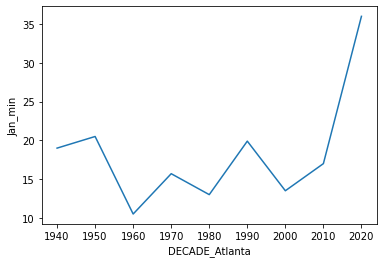

In [64]:


 sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Jan_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Feb_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Mar_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Apr_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='May_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Jun_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Jul_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Sep_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Oct_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Nov_min')
# sns.lineplot(data=atlanta_min_decade,x='DECADE_Atlanta',y='Dec_min')

(600.0, 800.0)

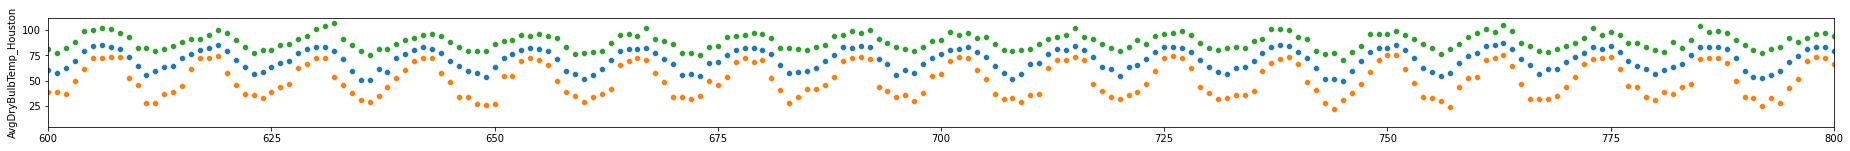

In [138]:
plt.figure(figsize=(32,2))
sns.scatterplot(data=houston_temps, x = houston_temps.index,y='AvgDryBulbTemp_Houston')
sns.scatterplot(data=houston_temps, x = houston_temps.index,y='MinDryBulbTemp_Houston')
sns.scatterplot(data=houston_temps, x = houston_temps.index,y='MaxDryBulbTemp_Houston')
plt.xlim(600,800)
#plt.axhline(houston_aggr['AvgDryBulbTemp_Houston'].mean())
#plt.axhline(houston_aggr['MinDryBulbTemp_Houston'].mean())
#plt.axhline(houston_aggr['MaxDryBulbTemp_Houston'].mean())

<AxesSubplot:ylabel='AvgStationPressure_Houston'>

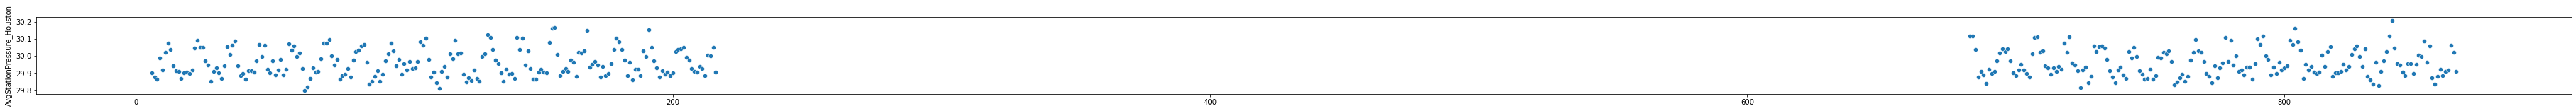

In [35]:
plt.figure(figsize=(64,2))
sns.scatterplot(x=date_values.index,y=houston_monthly_avg['AvgStationPressure_Houston'])

(400.0, 800.0)

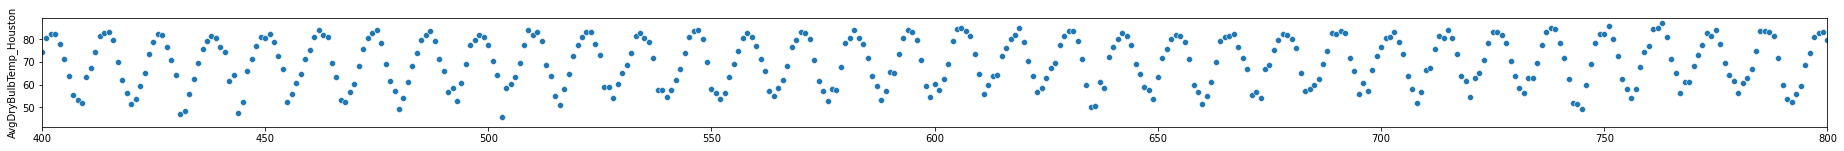

In [134]:
plt.figure(figsize=(32,2))
sns.scatterplot(x=date_values.index,y=houston_monthly_avg['AvgDryBulbTemp_Houston'])
#plt.axhline(houston_hourly['HourlyDryBulbTemperature'].mean())
plt.xlim(400,800)

<AxesSubplot:xlabel='HOUR', ylabel='HourlyDryBulbTemperature'>

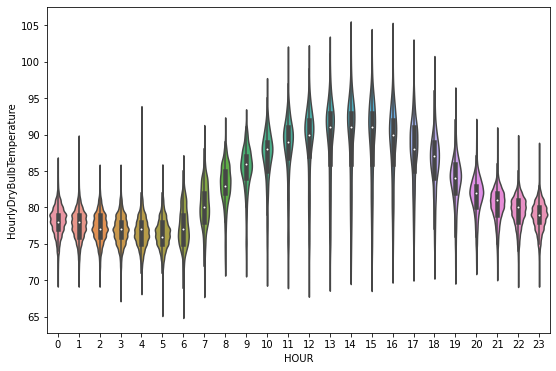

In [55]:
plt.figure(figsize = (9,6))
sns.violinplot(data=houston_hourly[(houston_hourly['MONTH']==7)], x='HOUR',y='HourlyDryBulbTemperature')

<AxesSubplot:xlabel='Month', ylabel='AvgWetBulbTemp_Houston'>

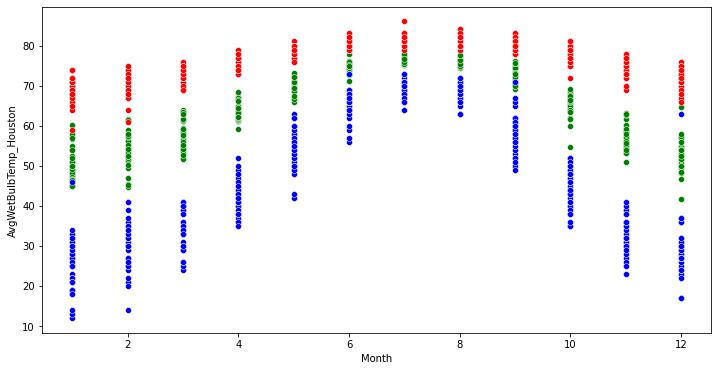

In [117]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=houston_monthly_avg, x='Month', y='AvgWetBulbTemp_Houston', color = 'g')
sns.scatterplot(data=houston_monthly_min, x='Month', y='MinWetBulbTemp_Houston', color = 'b')
sns.scatterplot(data=houston_monthly_max, x='Month', y='MaxWetBulbTemp_Houston', color='r')

In [118]:
concatenated = pd.concat([houston_monthly_avg.assign(dataset='AvgWetBulbTemp_Houston'), houston_monthly_min.assign(dataset='MinWetBulbTemp_Houston')])

AxesSubplot(0.125,0.125;0.775x0.755)
Month 1
AxesSubplot(0.125,0.125;0.775x0.755)
Month 2
AxesSubplot(0.125,0.125;0.775x0.755)
Month 3
AxesSubplot(0.125,0.125;0.775x0.755)
Month 4
AxesSubplot(0.125,0.125;0.775x0.755)
Month 5
AxesSubplot(0.125,0.125;0.775x0.755)
Month 6
AxesSubplot(0.125,0.125;0.775x0.755)
Month 7
AxesSubplot(0.125,0.125;0.775x0.755)
Month 8
AxesSubplot(0.125,0.125;0.775x0.755)
Month 9
AxesSubplot(0.125,0.125;0.775x0.755)
Month 10
AxesSubplot(0.125,0.125;0.775x0.755)
Month 11
AxesSubplot(0.125,0.125;0.775x0.755)
Month 12


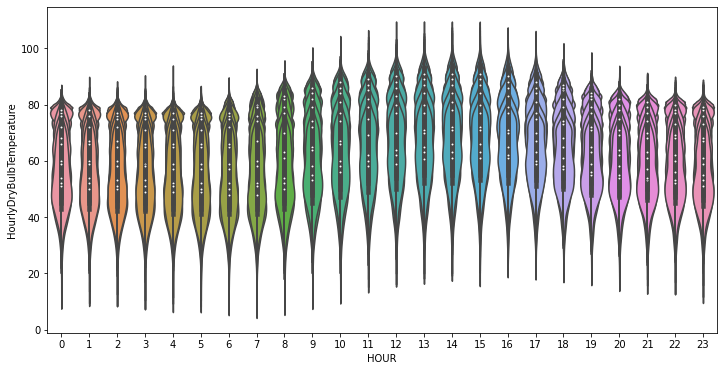

In [62]:
plt.figure(figsize=(12,6))
for i in range(1,13):
    print(sns.violinplot(data=houston_hourly[houston_hourly['MONTH']==i], x='HOUR',y='HourlyDryBulbTemperature',plot_kws={'alpha':1000000}));
    print(f'Month {i}');
    
#for i in range(1,13):
#    print(sns.violinplot(data=newyork_hourly[newyork_hourly['MONTH']==i], x='HOUR',y='HourlyDryBulbTemperature'));
#    print(f'Month {i}');

No handles with labels found to put in legend.


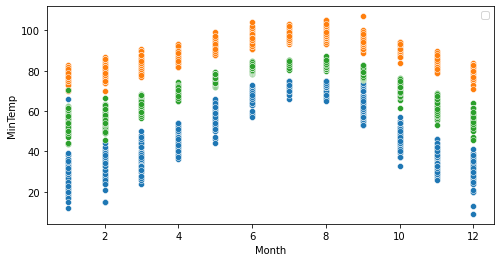

In [120]:
htown_scatter = date_values.copy()
htown_scatter['MinTemp'] = houston_monthly_min['MinDryBulbTemp_Houston']
htown_scatter['MaxTemp'] = houston_monthly_max['MaxDryBulbTemp_Houston']
htown_scatter['AvgTemp'] = houston_monthly_avg['AvgDryBulbTemp_Houston']

column_list = ['MinTemp','MaxTemp','AvgTemp']
plt.figure(figsize=(8,4))
sns.scatterplot(data=htown_scatter, x='Month', y='MinTemp')
sns.scatterplot(data=htown_scatter, x='Month', y='MaxTemp')
sns.scatterplot(data=htown_scatter, x='Month', y='AvgTemp')
plt.legend()

<AxesSubplot:xlabel='HourlyWindDirection', ylabel='Count'>

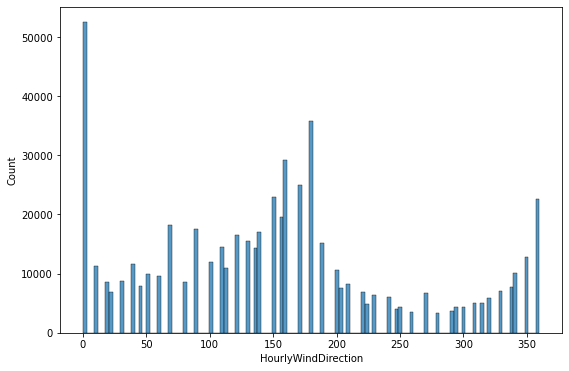

In [121]:
plt.figure(figsize=(9,6))
sns.histplot(houston_hourly['HourlyWindDirection'])

(600.0, 850.0)

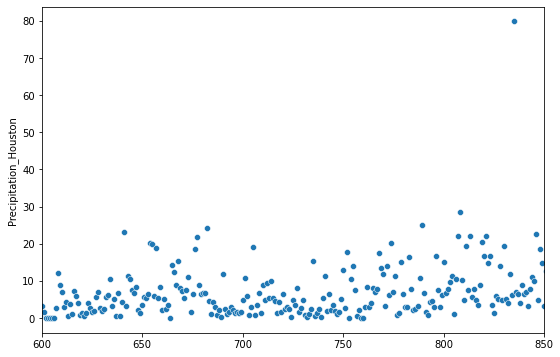

In [126]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=houston_monthly_avg.index,y=houston_monthly_avg['Precipitation_Houston'])
plt.xlim(600,850)

In [123]:
np.mean(np.sqrt((houston_hourly['HourlyDryBulbTemperature'] - houston_hourly['HourlyDewPointTemperature']) ** 2))

9.323022450816163

In [124]:
np.mean(np.sqrt((houston_hourly['HourlyDryBulbTemperature'] - houston_hourly['HourlyWetBulbTemperature']) ** 2))

5.640855831252601

In [125]:
np.mean(np.sqrt((houston_hourly['HourlyWetBulbTemperature'] - houston_hourly['HourlyDewPointTemperature']) ** 2))

3.9385308272632673